<a href="https://colab.research.google.com/github/sarjakpatel/SJSU/blob/main/CMPE%20258/Assignment%203/CMPE_258_Assignment_3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3 MB 43 kB/s 
     |████████████████████████████████| 50 kB 4.2 MB/s 
     |████████████████████████████████| 3.8 MB 40.7 MB/s 
     |████████████████████████████████| 449 kB 46.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=7d9c1757def8f56018bf122cff39c4de2f54571d56cd4c2b919a6e6847d6c553
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Success

In [44]:
import tensorflow as tf

In [45]:
x = tf.constant([[5, 2], [1, 3]])
print(x)

tf.Tensor(
[[5 2]
 [1 3]], shape=(2, 2), dtype=int32)


In [46]:
x.numpy()

array([[5, 2],
       [1, 3]], dtype=int32)

In [47]:
print('dtype:', x.dtype)
print('shape:', x.shape)

dtype: <dtype: 'int32'>
shape: (2, 2)


In [50]:
print(tf.ones(shape=(2, 1)))
print(tf.zeros(shape=(2, 1)))

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [51]:
tf.random.normal(shape=(2, 2), mean=0., stddev=1.)

<tf.Tensor: id=83527, shape=(2, 2), dtype=float32, numpy=
array([[1.1272511 , 0.93478405],
       [1.388839  , 0.37014732]], dtype=float32)>

In [52]:
tf.random.uniform(shape=(2, 2), minval=0, maxval=10, dtype='int32')

<tf.Tensor: id=83531, shape=(2, 2), dtype=int32, numpy=
array([[9, 9],
       [0, 7]], dtype=int32)>

In [53]:
initial_value = tf.random.normal(shape=(2, 2))
a = tf.Variable(initial_value)
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.34638292,  0.83389354],
       [-0.55608714, -0.32030225]], dtype=float32)>


In [54]:
new_value = tf.random.normal(shape=(2, 2))
a.assign(new_value)
for i in range(2):
  for j in range(2):
    assert a[i, j] == new_value[i, j]

In [55]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

c = a + b
d = tf.square(c)
e = tf.exp(d)

In [56]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

with tf.GradientTape() as tape:
  tape.watch(a)  # Start recording the history of operations applied to `a`
  c = tf.sqrt(tf.square(a) + tf.square(b))  # Do some math using `a`
  # What's the gradient of `c` with respect to `a`?
  dc_da = tape.gradient(c, a)
  print(dc_da)

tf.Tensor(
[[-0.97721    -0.5558092 ]
 [ 0.13763036 -0.3478691 ]], shape=(2, 2), dtype=float32)


In [57]:
a = tf.Variable(a)

with tf.GradientTape() as tape:
  c = tf.sqrt(tf.square(a) + tf.square(b))
  dc_da = tape.gradient(c, a)
  print(dc_da)

tf.Tensor(
[[-0.97721    -0.5558092 ]
 [ 0.13763036 -0.3478691 ]], shape=(2, 2), dtype=float32)


In [58]:
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as tape:
    c = tf.sqrt(tf.square(a) + tf.square(b))
    dc_da = tape.gradient(c, a)
  d2c_da2 = outer_tape.gradient(dc_da, a)
  print(d2c_da2)

tf.Tensor(
[[0.04336804 0.4114572 ]
 [0.72453266 1.160522  ]], shape=(2, 2), dtype=float32)


**Linear regression**

In [59]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    # Note that `tape.gradient` works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

Let's generate some artificial data to demonstrate our model:

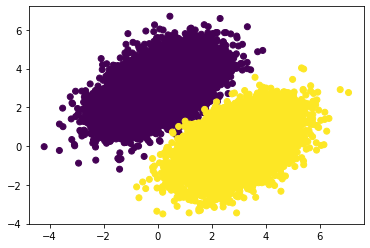

In [60]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare a dataset.
num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

Now let's train our linear regression by iterating over batch-by-batch over the data and repeatedly calling train_on_batch:

In [61]:
# Shuffle the data.
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.0757
Epoch 1: last batch loss = 0.0730
Epoch 2: last batch loss = 0.0389
Epoch 3: last batch loss = 0.0359
Epoch 4: last batch loss = 0.0354
Epoch 5: last batch loss = 0.0283
Epoch 6: last batch loss = 0.0264
Epoch 7: last batch loss = 0.0113
Epoch 8: last batch loss = 0.0185
Epoch 9: last batch loss = 0.0265


Here's how our model performs:

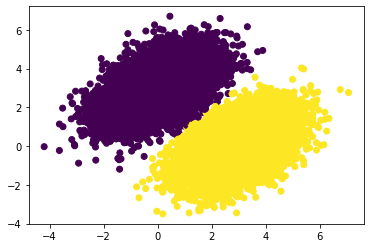

In [62]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)


Making it fast with tf.function

In [63]:
import time

t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / 20,))

Time per epoch: 0.151 s




Let's compile the training function into a static graph. Literally all we need to do is add the tf.function decorator on it:


In [64]:
@tf.function
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

Let's try again:

In [65]:
t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / 20,))

Time per epoch: 0.089 s
